<h1 align="center">Handwritten digits classification using neural network</h1>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [134]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [135]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [136]:
len(X_train)

60000

In [137]:
len(X_test)

10000

In [138]:
X_train[0].shape

(28, 28)

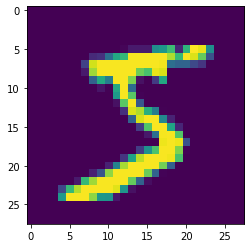

In [139]:
z=plt.imshow(X_train[0])
z

In [140]:
y_train[0]

5

In [141]:
X_train = X_train / 255
X_test = X_test / 255

In [142]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

<h3 >Very simple neural network with no hidden layers</h3>

In [143]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4718 - accuracy: 0.8752
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2840 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2739 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9256


In [144]:
model.evaluate(X_test,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 0.2691 - accuracy: 0.9255


[0.26907896995544434, 0.9254999756813049]

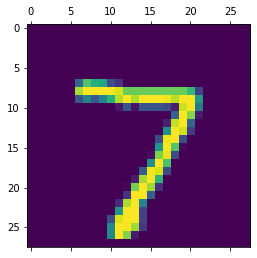

In [145]:
plt.matshow(X_test[0])

In [146]:
y_predicted = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [147]:
y_predicted.shape

(10000, 10)

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

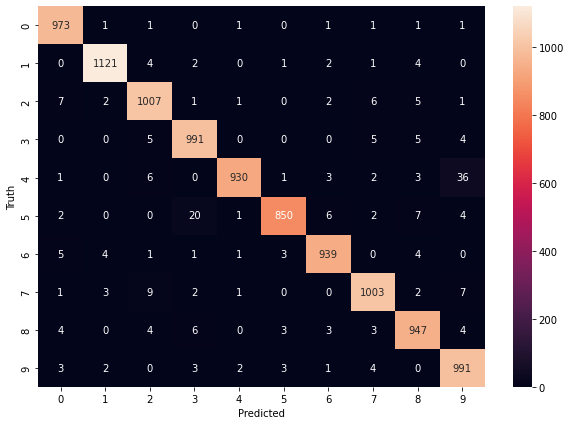

In [154]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**np.argmax finds a maximum element  from an array and returns the index of it**

<h3 >Using hidden layer</h3>

In [149]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train_categorical, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2736 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1212 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0857 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0652 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9844


In [151]:
model.evaluate(X_test,y_test_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9752


[0.08045167475938797, 0.9751999974250793]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

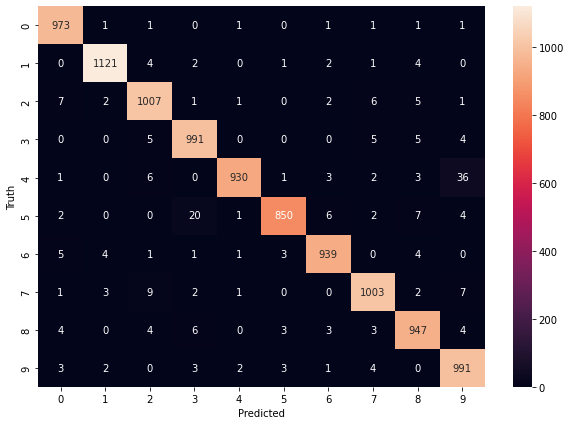

In [152]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')